In [3]:
# Load environment
import gym
env=gym.make("Taxi-v3").env

In [4]:
# Action space
print("Action space {}".format(env.action_space))

Action space Discrete(6)


In [6]:
# States
print("State space {}".format(env.observation_space))

State space Discrete(500)


In [14]:
# Rewards

state=223 
action=0 #drive down(south)

print('env.P[state][action][2]:',env.P[state][action][0])

env.P[state][action][2]: (1.0, 323, -1, False)


In [15]:
# Need to call reset() at least once before render() will work
env.reset()

env.s = 123
env.render(mode='human')

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [18]:
# Need to call reset() at least once before render() will work
env.reset()

env.s = 365
env.render(mode='human')

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [19]:
# Random agent
class RandomAgent:
    def __init__(self, env):
        self.env=env
    
    def get_action(self, state)-> int:
        return self.env.action_space.sample()

agent=RandomAgent(env)


In [21]:
#Evaluate this driver starting at initial state=123
state=123
env.s=state

epochs=0
penalties=0 #wrong pick up or drop off
reward=0

#store frames to plot them later on
frames=[]
done=False

while not done:
    action=agent.get_action(state)
    state, reward, done,info=env.step(action)
    
    if reward==-10:
        penalties+=1
    
    frames.append({
        'frame':env.render(mode="ansi"),
        'state':state,
        'action':action,
        'reward':reward
    })
    epochs+=1

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))



Timesteps taken: 2536
Penalties incurred: 843


In [23]:
from IPython.display import clear_output
from time import sleep

def print_frame(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i+1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.01)
        
print_frame(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 2536
State: 475
Action: 5
Reward: 20


In [26]:
# see more representative measure of performance, we can repeat the same evaluation loop n=100 times starting 
# each time at a random state

from tqdm import tqdm

n_episodes=100

# for plotting metrics
timesteps_per_episode=[]
penalties_per_episode=[]

for i in tqdm(range(0, n_episodes)):
    # reset environment
    state=env.reset()
    
    epochs, penalties, rewards=0,0,0
    done=False
    
    while not done:
        action=agent.get_action(state)
        next_state, reward, done,info=env.step(action)
        
        if reward==-10:
            penalties+=1
        
        state=next_state
        epochs+=1
    
    timesteps_per_episode.append(epochs)
    penalties_per_episode.append(penalties)


100%|██████████| 100/100 [00:02<00:00, 36.04it/s]


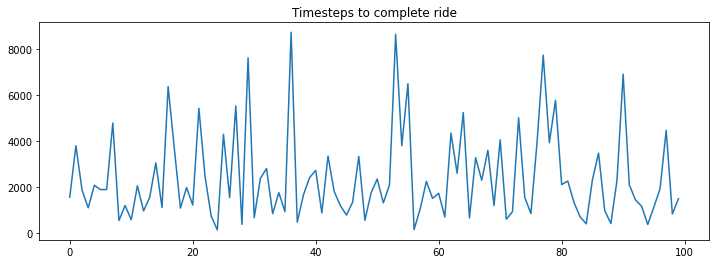

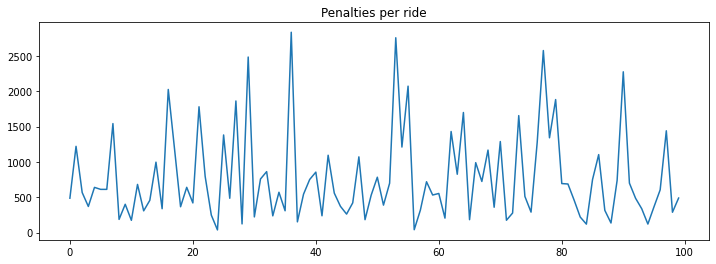

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")    
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_episode).plot(kind="line")
plt.show()

In [29]:
import numpy as np
print(f'Avg steps to complete ride: {np.array(timesteps_per_episode).mean()}')
print(f'Avg penalties to complete ride: {np.array(penalties_per_episode).mean()}')


Avg steps to complete ride: 2401.61
Avg penalties to complete ride: 775.64
